In [30]:
import pandas as pd
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from wordcloud import WordCloud

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

%matplotlib inline 

In [31]:
df = pd.read_csv("spam_ham_dataset.csv",',')

C:\Users\Ivan\AppData\Local\Temp\ipykernel_17612\4037805200.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv("spam_ham_dataset.csv",',')


In [32]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [33]:
df.label.value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [35]:
df.text = df.text.apply(lambda x: x[9::])

In [36]:
df['len'] = df['text'].apply(len)
df

,Unnamed: 0,label,text,label_num,len
0,605,ham,enron methanol ; meter # : 988291\r\nthis is a...,0,318
1,2349,ham,"hpl nom for january 9 , 2001\r\n( see attached...",0,88
2,3624,ham,"neon retreat\r\nho ho ho , we ' re around to t...",0,2515
3,4685,spam,"photoshop , windows , office . cheap . main tr...",1,405
4,2030,ham,re : indian springs\r\nthis deal is to book th...,0,327
...,...,...,...,...,...
5166,1518,ham,put the 10 on the ft\r\nthe transport volumes ...,0,525
5167,404,ham,3 / 4 / 2000 and following noms\r\nhpl can ' t...,0,1105
5168,2933,ham,calpine daily gas nomination\r\n>\r\n>\r\njuli...,0,393
5169,1409,ham,industrial worksheets for august 2000 activity...,0,564


<Axes: xlabel='label', ylabel='count'>

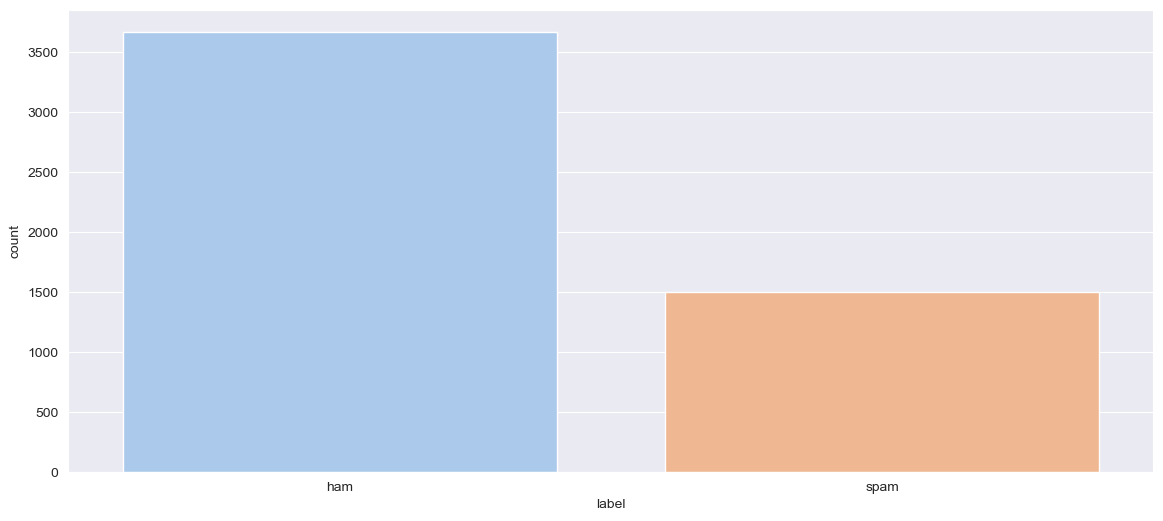

In [37]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.countplot(data=df,x='label',palette='pastel')

C:\Users\Ivan\AppData\Local\Temp\ipykernel_17612\429809638.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x='len',palette='pastel')


<Axes: xlabel='len', ylabel='Count'>

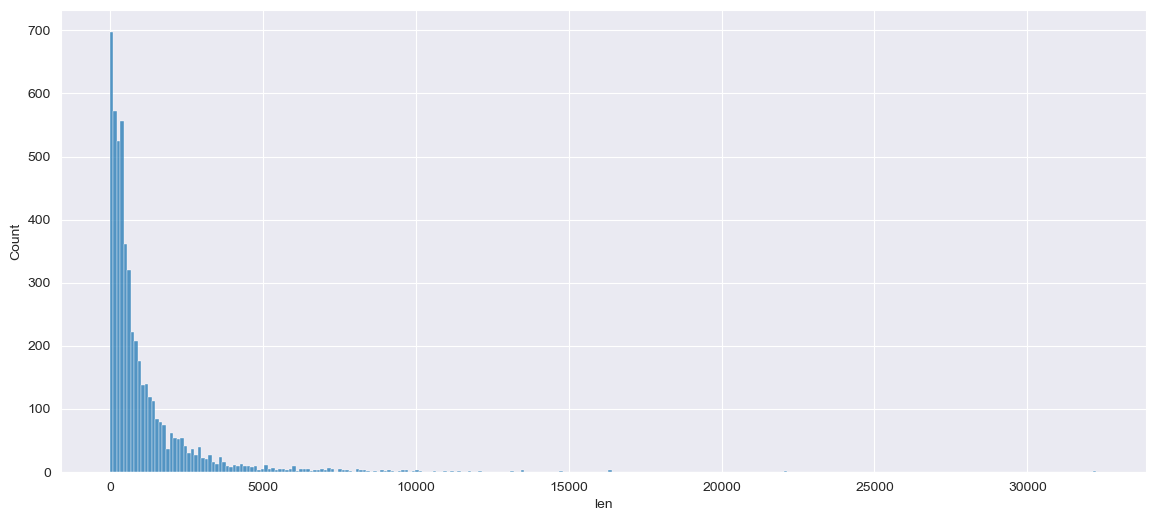

In [38]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.histplot(data=df,x='len',palette='pastel')

In [39]:
df[df['len']==df['len'].max()]

,Unnamed: 0,label,text,label_num,len
949,3488,ham,"fw : "" red , white and blue out ""\r\n- - - - -...",0,32249


In [40]:
df[df['len']==df['len'].min()]

,Unnamed: 0,label,text,label_num,len
154,4592,spam,\r\n,1,2
182,4727,spam,\r\n,1,2
296,4690,spam,\r\n,1,2
363,4682,spam,\r\n,1,2
1130,4136,spam,\r\n,1,2
1279,3749,spam,\r\n,1,2
1369,4282,spam,\r\n,1,2
2184,4600,spam,\r\n,1,2
2538,4705,spam,\r\n,1,2
2665,4062,spam,\r\n,1,2


C:\Users\Ivan\AppData\Local\Temp\ipykernel_17612\2876276247.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['label']=='spam'],x='len',palette='pastel')


<Axes: xlabel='len', ylabel='Count'>

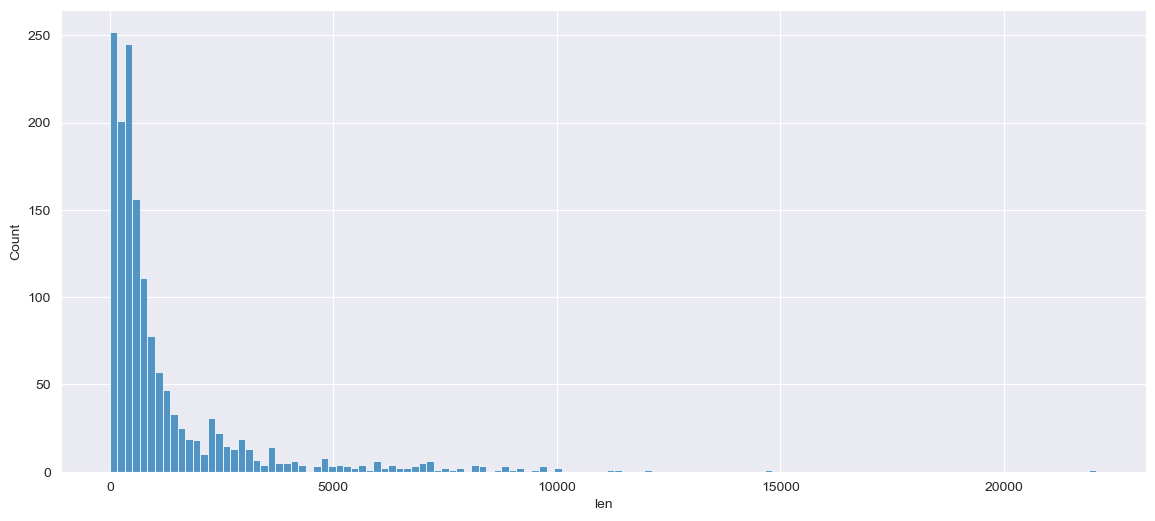

In [41]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.histplot(data=df[df['label']=='spam'],x='len',palette='pastel')

C:\Users\Ivan\AppData\Local\Temp\ipykernel_17612\505674958.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df[df['label']=='ham'],x='len',palette='pastel')


<Axes: xlabel='len', ylabel='Count'>

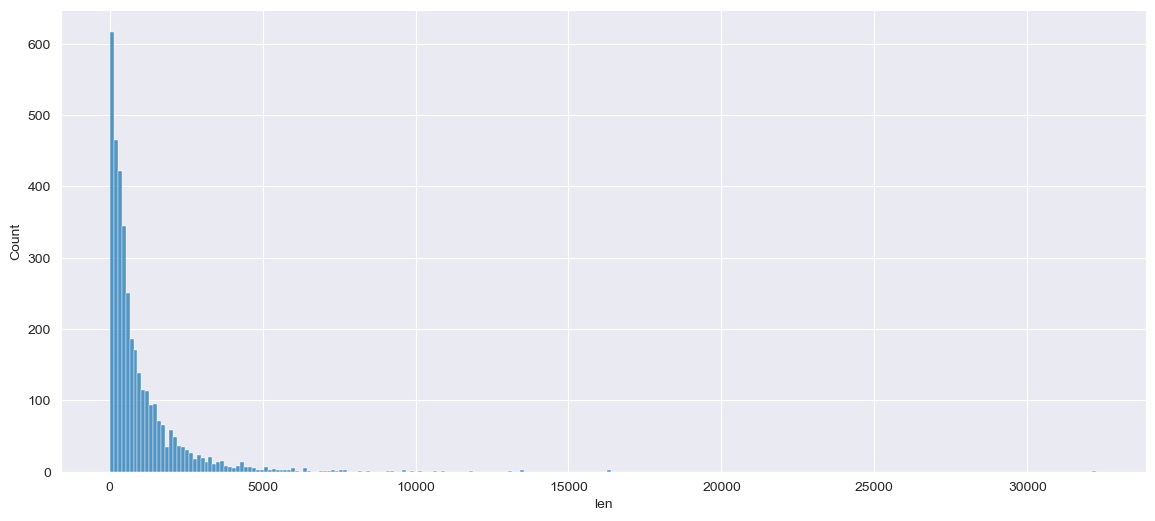

In [42]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.histplot(data=df[df['label']=='ham'],x='len',palette='pastel')

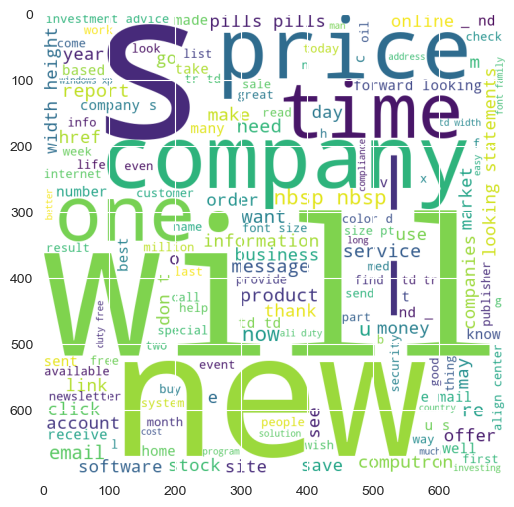

In [43]:
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label_num'] == 1]['text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

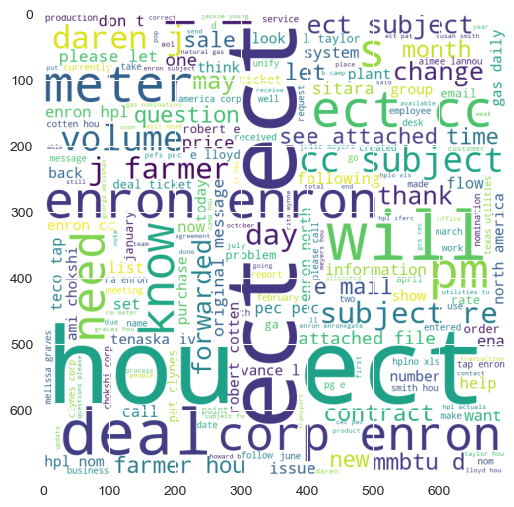

In [44]:
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['label_num'] == 0]['text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

In [45]:
X = df['text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

naive_model = MultinomialNB()
naive_model.fit(X_train_vec, y_train)

y_pred = naive_model.predict(X_test_vec)

print('Accuracy : {:.5f}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 0.97616


In [21]:
X_train

1023    re : tenaska\r\ni see the demand fee changes a...
4586    strong buy alert : monthly newsletter\r\ntopst...
2955    performance feedback\r\neach of you have been ...
2495    hr performance objectives binders\r\ngood morn...
3353    fw : [ fwd : fw : drawing by a school age chil...
                              ...                        
4426    re : ena sales on hpl\r\nlast that i had , was...
466     tenaska iv\r\nbob :\r\ni understand from sandi...
3092    broom , bristles up , flew\r\nbe differentiabl...
3772    calpine daily gas nomination ( weekend )\r\n>\...
860     re : meter 1459 , 6 / 00\r\nyep , you ' re rig...
Name: text, Length: 3619, dtype: object

In [47]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes model
naive_model = MultinomialNB()
naive_model.fit(X_train_vec, y_train)

# Predict using the trained model
y_pred = naive_model.predict(X_test_vec)

print('Accuracy : {:.5f}'.format(accuracy_score(y_test, y_pred)))

Accuracy : 0.87178


In [50]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbdt = GradientBoostingClassifier()    
xgb  = XGBClassifier()

clfs = [('SVC', svc),('KNeighborsClassifier', knc), ('DecisionTreeClassifier', dtc), ('MultinomialNB', mnb),
        ('LogisticRegression', lrc),('RandomForestClassifier', rfc),('AdaBoostClassifier', abc),
        ('GradientBoostingClassifier', gbdt),('XGBClassifier', xgb)]

In [51]:
accuraces = []
precisions = []
recalls = []
f1_scores = []
for clf_name, clf in clfs:
    clf.fit(X_train_vec, y_train)    
  
    y_pred = clf.predict(X_test_vec)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print('{:s}\n    accuracy : {:.5f} \n    precision : {:.5f} \n    recall : {:.5f}'.format(clf_name,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
    print(classification_report(y_test, y_pred))
    
    accuraces.append(accuracy*100)
    precisions.append(precision*100)
    recalls.append(recall*100)


SVC
    accuracy : 0.98518 
    precision : 0.95946 
    recall : 0.98840
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1121
           1       0.96      0.99      0.97       431

    accuracy                           0.99      1552
   macro avg       0.98      0.99      0.98      1552
weighted avg       0.99      0.99      0.99      1552

KNeighborsClassifier
    accuracy : 0.53222 
    precision : 0.37252 
    recall : 1.00000
              precision    recall  f1-score   support

           0       1.00      0.35      0.52      1121
           1       0.37      1.00      0.54       431

    accuracy                           0.53      1552
   macro avg       0.69      0.68      0.53      1552
weighted avg       0.83      0.53      0.53      1552

DecisionTreeClassifier
    accuracy : 0.93943 
    precision : 0.89647 
    recall : 0.88399
              precision    recall  f1-score   support

           0       0.96      0.96

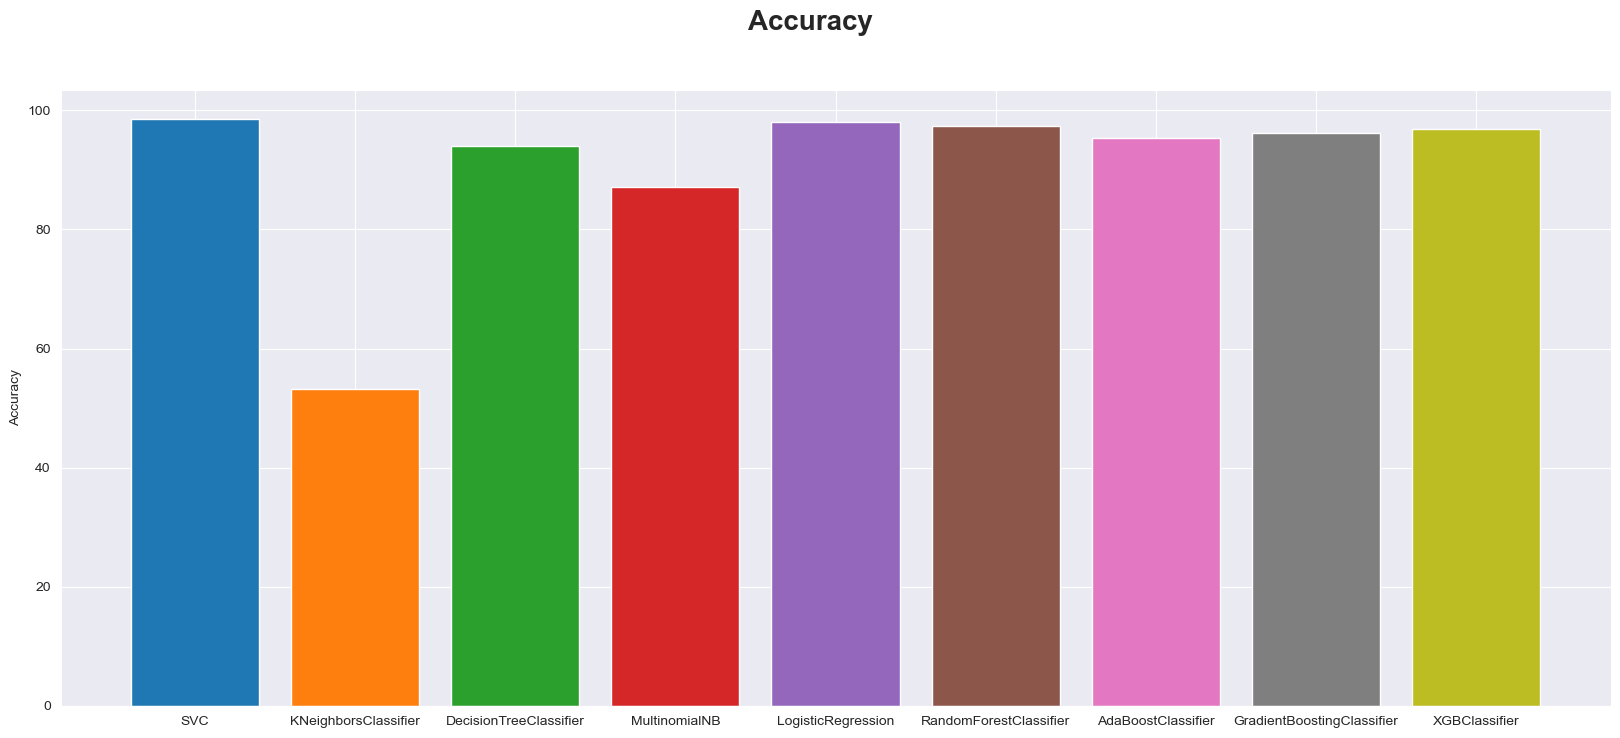

In [55]:
i=0
fig = plt.figure()
for clf_name,clf in clfs:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(clf_name, accuraces[i])
    plt.ylabel('Accuracy')
    fig.suptitle('Accuracy', fontsize=20, fontweight='bold')
    i+=1  

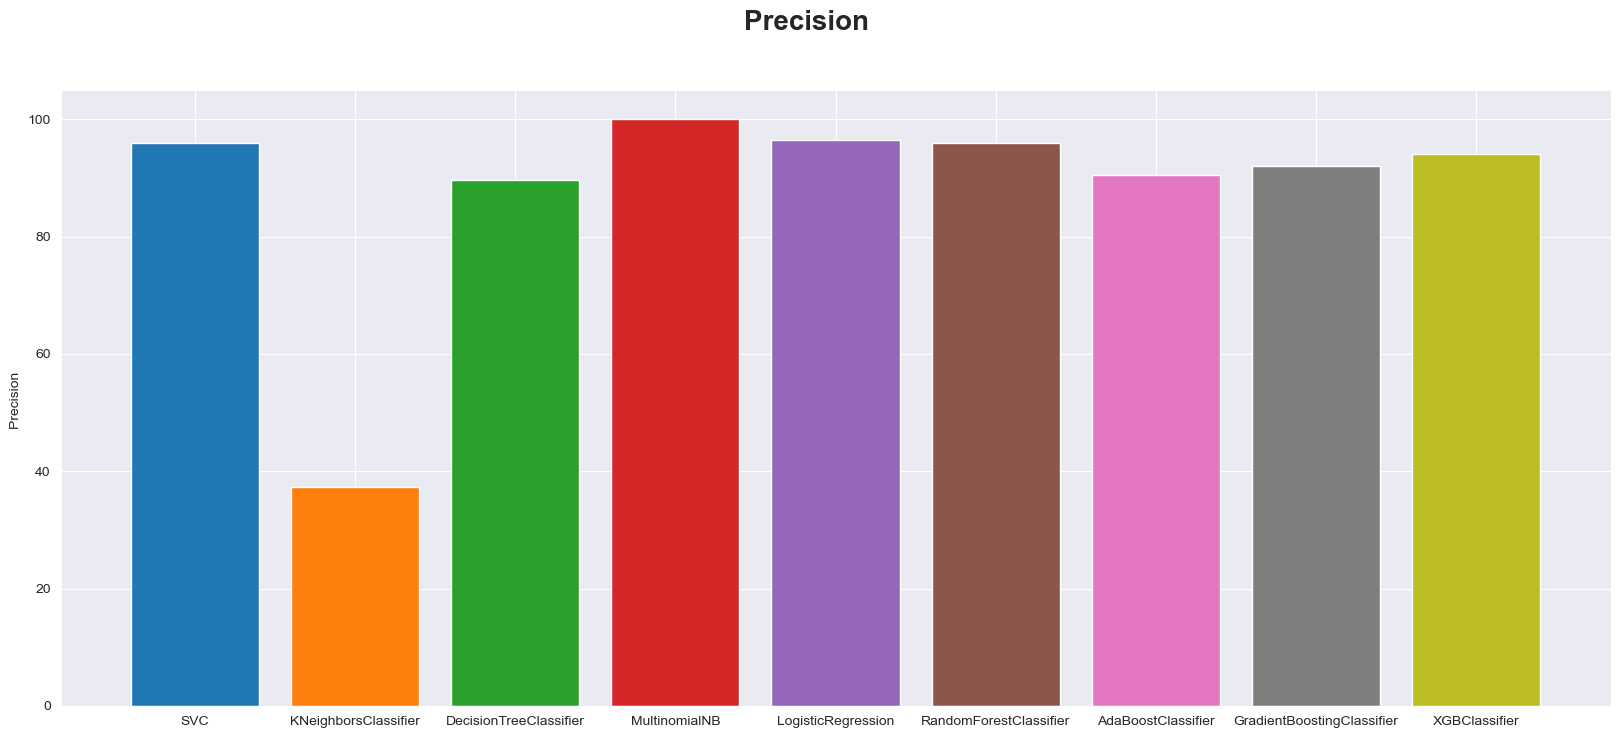

In [53]:
i=0
fig = plt.figure()
for clf_name,clf in clfs:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(clf_name, precisions[i])
    plt.ylabel('Precision ')
    fig.suptitle('Precision ', fontsize=20, fontweight='bold')
    i+=1  

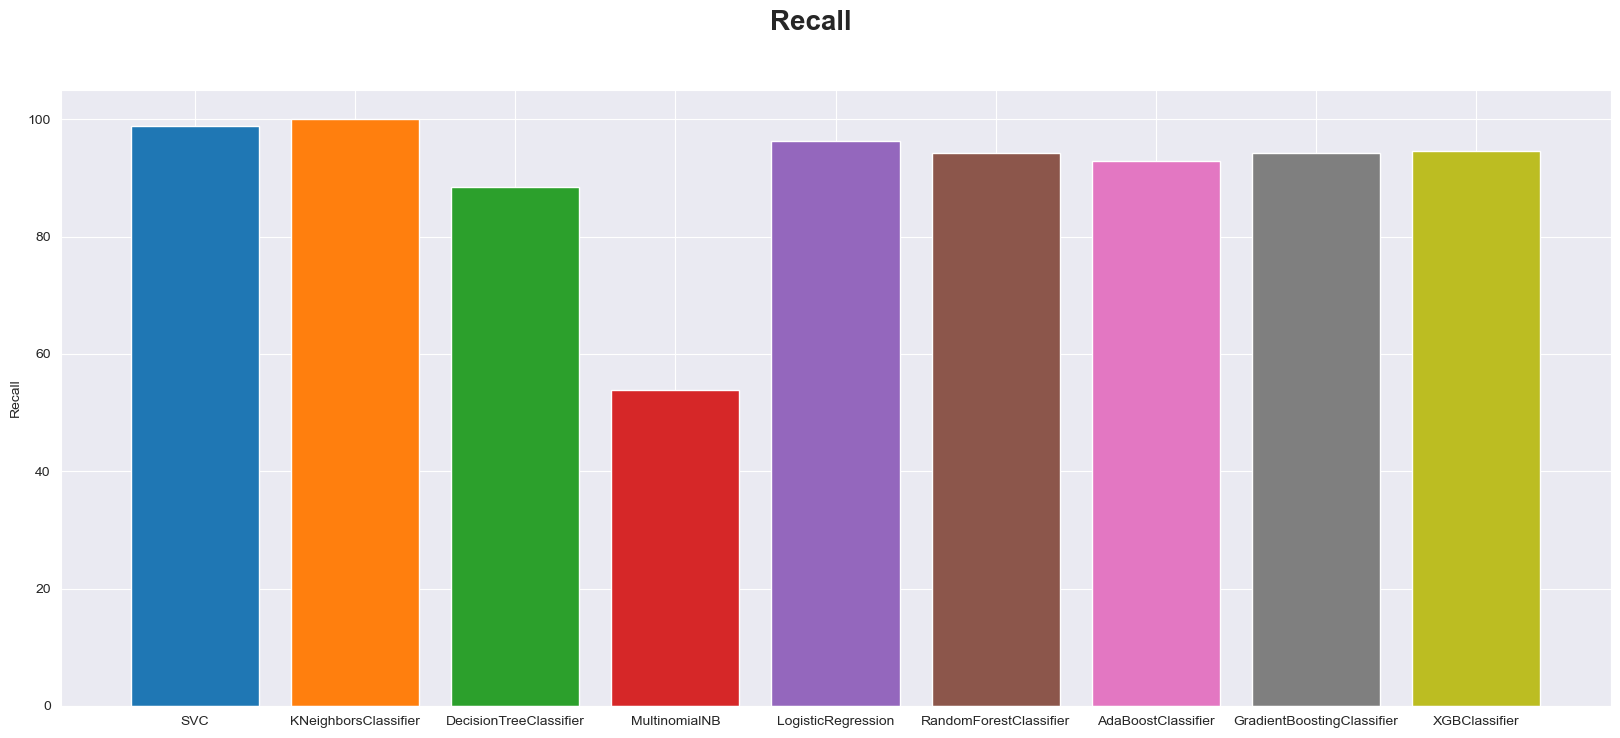

In [54]:
i=0
fig = plt.figure()
for clf_name,clf in clfs:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(clf_name, recalls[i])
    plt.ylabel('Recall')
    fig.suptitle('Recall', fontsize=20, fontweight='bold')
    i+=1  

In [56]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

svc = SVC()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
mnb = MultinomialNB()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbdt = GradientBoostingClassifier()    
xgb  = XGBClassifier()

clfs = [('SVC', svc),('KNeighborsClassifier', knc), ('DecisionTreeClassifier', dtc), ('MultinomialNB', mnb),
        ('LogisticRegression', lrc),('RandomForestClassifier', rfc),('AdaBoostClassifier', abc),
        ('GradientBoostingClassifier', gbdt),('XGBClassifier', xgb)]

In [57]:
accuraces = []
precisions = []
recalls = []
f1_scores = []
for clf_name, clf in clfs:
    clf.fit(X_train_vec, y_train)    
  
    y_pred = clf.predict(X_test_vec)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print('{:s}\n    accuracy : {:.5f} \n    precision : {:.5f} \n    recall : {:.5f}'.format(clf_name,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
    print(classification_report(y_test, y_pred))
    
    accuraces.append(accuracy*100)
    precisions.append(precision*100)
    recalls.append(recall*100)


SVC
    accuracy : 0.96843 
    precision : 0.92634 
    recall : 0.96288
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1121
           1       0.93      0.96      0.94       431

    accuracy                           0.97      1552
   macro avg       0.96      0.97      0.96      1552
weighted avg       0.97      0.97      0.97      1552

KNeighborsClassifier
    accuracy : 0.84729 
    precision : 0.68371 
    recall : 0.83759
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1121
           1       0.68      0.84      0.75       431

    accuracy                           0.85      1552
   macro avg       0.81      0.84      0.82      1552
weighted avg       0.86      0.85      0.85      1552

DecisionTreeClassifier
    accuracy : 0.95168 
    precision : 0.88865 
    recall : 0.94432
              precision    recall  f1-score   support

           0       0.98      0.95

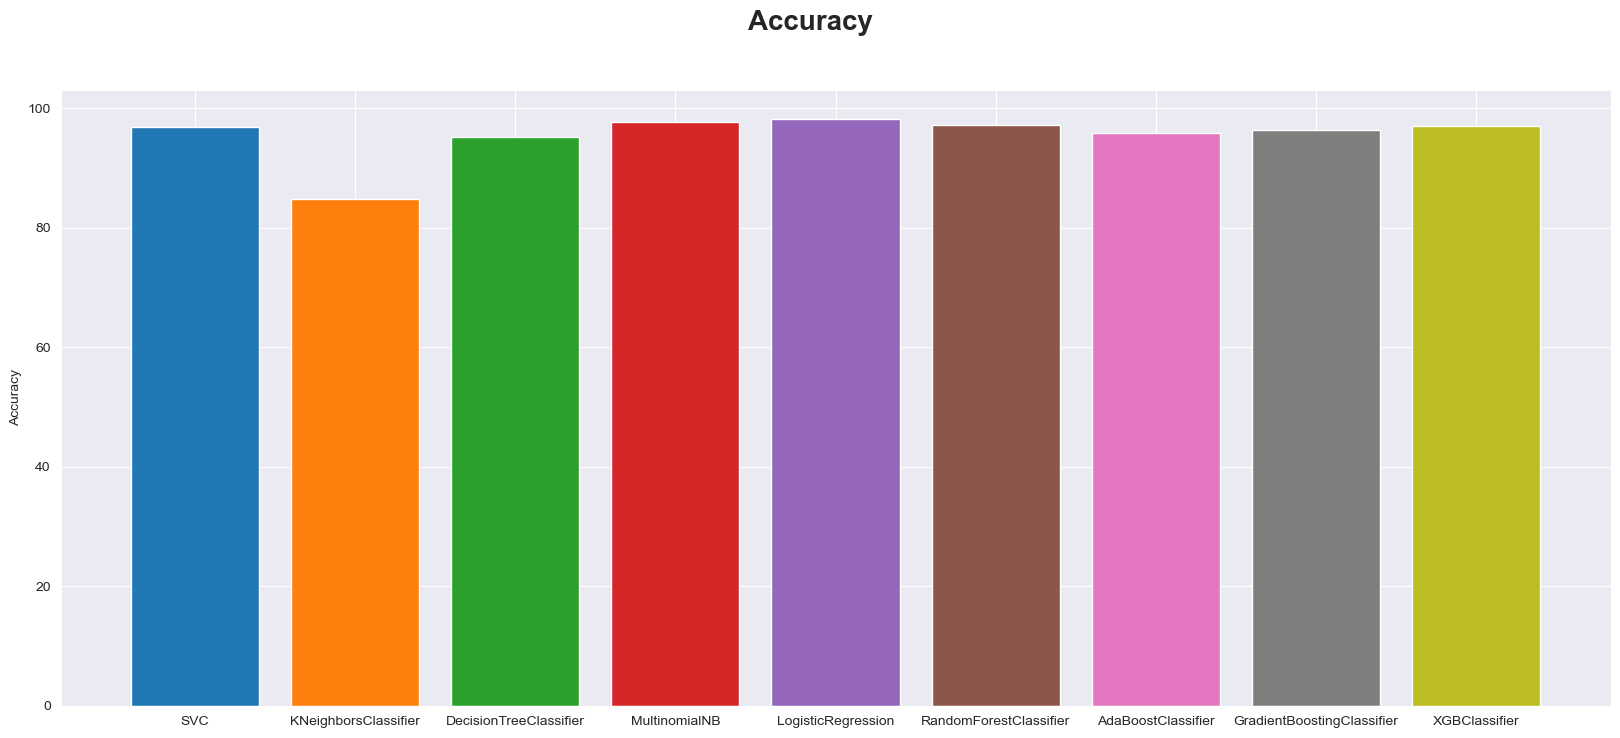

In [58]:
i=0
fig = plt.figure()
for clf_name,clf in clfs:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(clf_name, accuraces[i])
    plt.ylabel('Accuracy')
    fig.suptitle('Accuracy', fontsize=20, fontweight='bold')
    i+=1  

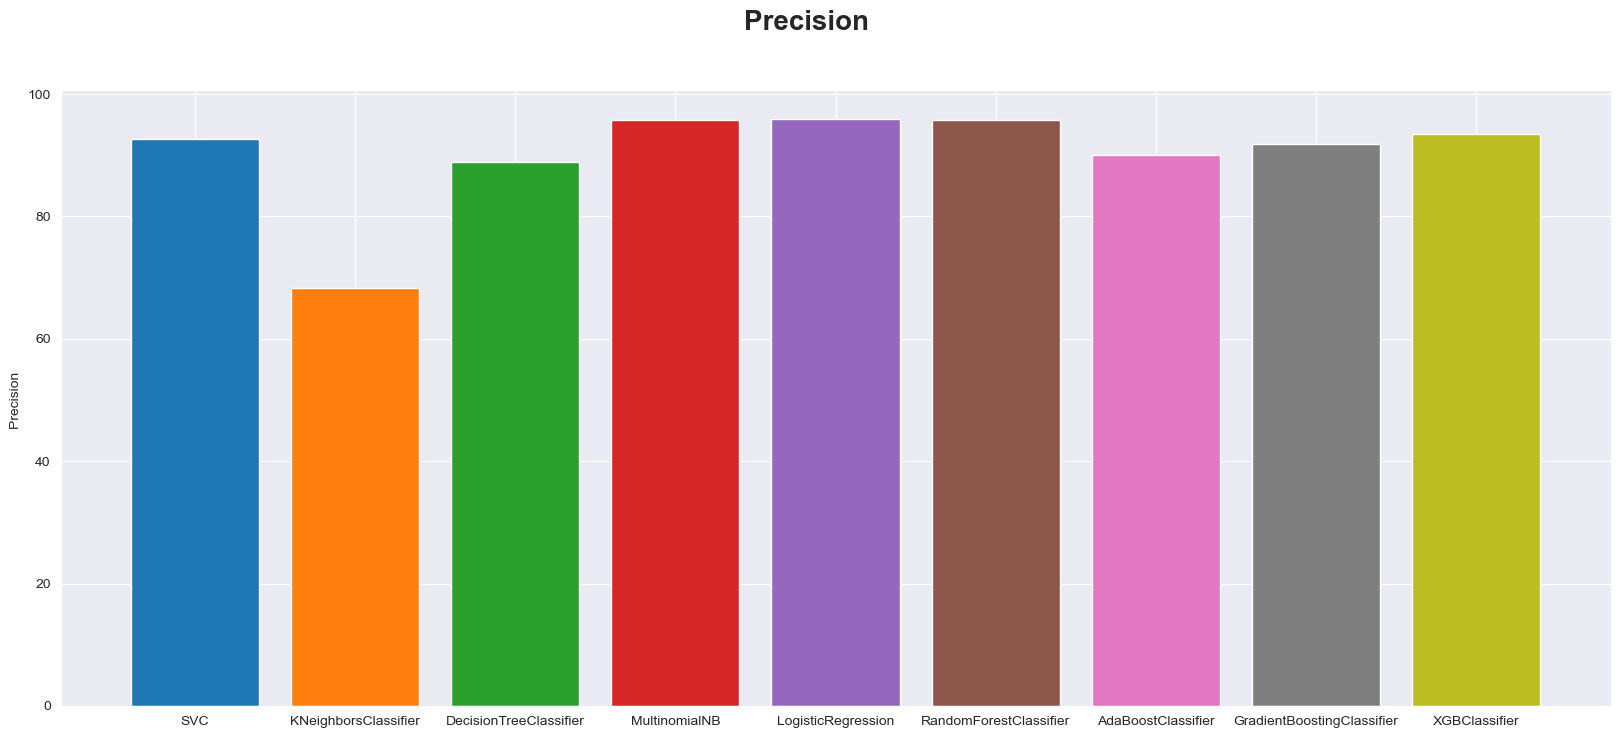

In [59]:
i=0
fig = plt.figure()
for clf_name,clf in clfs:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(clf_name, precisions[i])
    plt.ylabel('Precision ')
    fig.suptitle('Precision ', fontsize=20, fontweight='bold')
    i+=1  

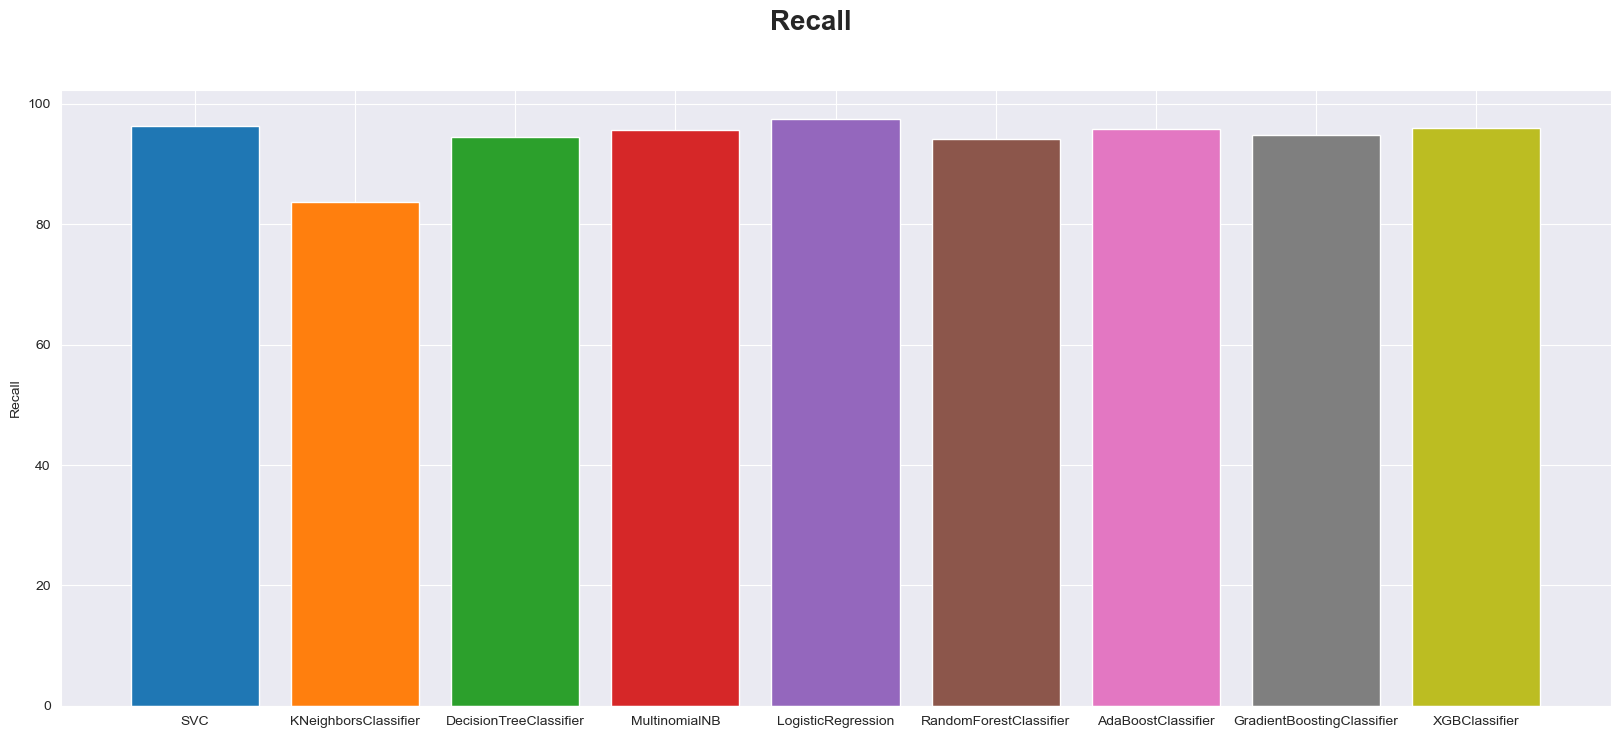

In [60]:
i=0
fig = plt.figure()
for clf_name,clf in clfs:
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(clf_name, recalls[i])
    plt.ylabel('Recall')
    fig.suptitle('Recall', fontsize=20, fontweight='bold')
    i+=1  